In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ruleset
import numpy as np

In [9]:
dataset = pd.read_csv("dirty_irisdata.csv")

In [10]:
dataset.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
5,5.3,NaN,NaN,0.2,setosa
6,6.4,2.7,5.3,NaN,virginica
7,5.9,3.0,5.1,1.8,virginica
8,5.8,2.7,4.1,1.0,versicolor
9,4.8,3.1,1.6,0.2,setosa


In [11]:
new_n = dataset.dropna().shape[0]
n = dataset.shape[0]
print(f"Number of complete records:{new_n}")
print("Percentage of complete records:{:.2f}%".format(float(new_n*100/n)))

Number of complete records:96
Percentage of complete records:64.00%


In [12]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True)
dataset.replace(['?',np.inf], 'NA',inplace=True)

In [13]:
dataset.head(5)

,index,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,0,6.4,3.2,4.5,1.5,versicolor
1,1,6.3,3.3,6.0,2.5,virginica
2,3,5.0,3.4,1.6,0.4,setosa
3,4,5.7,2.6,3.5,1.0,versicolor
4,7,5.9,3.0,5.1,1.8,virginica


In [14]:
rules = []

In [15]:
rules.append(ruleset.check_species)
rules.append(ruleset.check_positive)
rules.append(ruleset.check_petal_length)
rules.append(ruleset.check_sepal_length)
rules.append(ruleset.check_sepal_length2)

In [16]:
violations = []
rule = list(map(lambda x: "rule"+str(x), range(1,len(rules)+1)))
for i in range(len(rules)):
    violation,desc = rules[i](dataset)
    print(f"{rule[i]}: {desc}\nviolations:{violation}")
    violations.append(violation)

rule1: Checking if all species consist of setosa, versicolor and virginica
violations:0
rule2: Checking if there all the length values are greater than 0
violations:1
rule3: Checking if petal length is at least twice of petal width
violations:2
rule4: Checking if all sepal lengths are below 30 cm
violations:1
rule5: Checking if sepal length is more than petal length
violations:1


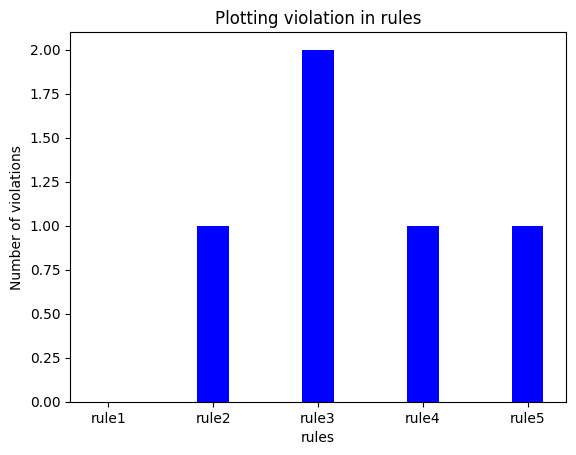

In [17]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot()
ax.bar(rule,violations,0.3,color = 'blue')
plt.ylabel("Number of violations")
plt.xlabel("rules")
plt.title("Plotting violation in rules")
plt.show()

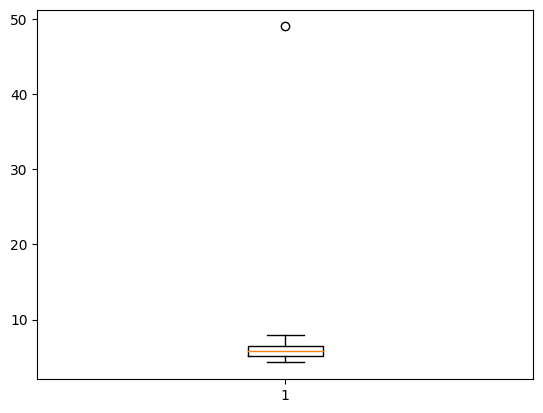

In [18]:

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot()
ax.boxplot(dataset["Sepal.Length"][dataset["Sepal.Length"]!='NA'])
plt.show()

ruleset.py

In [ ]:
def check_species(dataset):
    n = dataset.shape[0]
    species = dataset["Species"][dataset["Species"]!='NA']
    correct_n = species[species.isin(["setosa","versicolor","virginica"])].shape[0]
    return n-correct_n, "Checking if all species consist of setosa, versicolor and virginica"

def check_positive(dataset):
    violation_n = 0
    for i in dataset.values:
        for j in i:
            if isinstance(j,float):
                if j<0:
                    violation_n+=1
    return violation_n, "Checking if there all the length values are greater than 0"

def check_petal_length(dataset):
    n = dataset.shape[0]
    correct_n = 0
    for i in range(n):
        if dataset["Petal.Width"][i]=='NA' or dataset["Petal.Length"][i]=='NA':
            continue
        elif dataset["Petal.Width"][i]*2>dataset["Petal.Length"][i]:
            continue
        else:
            correct_n+=1
    return n-correct_n, "Checking if petal length is at least twice of petal width"

def check_sepal_length(dataset):
    n = dataset.shape[0]
    sl = dataset["Sepal.Length"][dataset["Sepal.Length"]!='NA']
    correct_n = sl[sl<=30].shape[0]
    return n-correct_n, "Checking if all sepal lengths are below 30 cm"


def check_sepal_length2(dataset):
    n = dataset.shape[0]
    correct_n = 0
    for i in range(n):
        if dataset["Sepal.Length"][i]=='NA' or dataset["Petal.Length"][i]=='NA':
            continue
        elif dataset["Petal.Length"][i]>=dataset["Sepal.Length"][i]:
            continue
        else:
            correct_n+=1
    return n-correct_n, "Checking if sepal length is more than petal length"

dirty_iricdata.csv

In [ ]:
"Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"
6.4,3.2,4.5,1.5,"versicolor"
6.3,3.3,6,2.5,"virginica"
6.2,NA,5.4,2.3,"virginica"
5,3.4,1.6,0.4,"setosa"
5.7,2.6,3.5,1,"versicolor"
5.3,NA,NA,0.2,"setosa"
6.4,2.7,5.3,NA,"virginica"
5.9,3,5.1,1.8,"virginica"
5.8,2.7,4.1,1,"versicolor"
4.8,3.1,1.6,0.2,"setosa"
5,3.5,1.6,0.6,"setosa"
6,2.7,5.1,1.6,"versicolor"
6,3,4.8,NA,"virginica"
6.8,2.8,4.8,1.4,"versicolor"
NA,3.9,1.7,0.4,"setosa"
5,-3,3.5,1,"versicolor"
5.5,NA,4,1.3,"versicolor"
4.7,3.2,1.3,0.2,"setosa"
NA,4,NA,0.2,"setosa"
5.6,NA,4.2,1.3,"versicolor"
4.9,3.6,NA,0.1,"setosa"
5.4,NA,4.5,1.5,"versicolor"
6.2,2.8,NA,1.8,"virginica"
6.7,3.3,5.7,2.5,"virginica"
NA,3,5.9,2.1,"virginica"
4.6,3.2,1.4,0.2,"setosa"
4.9,3.1,1.5,0.1,"setosa"
73,29,63,NA,"virginica"
6.5,3.2,5.1,2,"virginica"
NA,2.8,0.82,1.3,"versicolor"
4.4,3.2,NA,0.2,"setosa"
5.9,3.2,4.8,NA,"versicolor"
5.7,2.8,4.5,1.3,"versicolor"
6.2,2.9,NA,1.3,"versicolor"
6.6,2.9,23,1.3,"versicolor"
4.8,3,1.4,0.1,"setosa"
6.5,3,5.5,1.8,"virginica"
6.2,2.2,4.5,1.5,"versicolor"
6.7,2.5,5.8,1.8,"virginica"
5,3,1.6,0.2,"setosa"
5,NA,1.2,0.2,"setosa"
5.8,2.7,3.9,1.2,"versicolor"
0,NA,1.3,0.4,"setosa"
5.8,2.7,5.1,1.9,"virginica"
5.5,4.2,1.4,0.2,"setosa"
7.7,2.8,6.7,2,"virginica"
5.7,NA,NA,0.4,"setosa"
7,3.2,4.7,1.4,"versicolor"
6.5,3,5.8,2.2,"virginica"
6,3.4,4.5,1.6,"versicolor"
5.5,2.6,4.4,1.2,"versicolor"
4.9,3.1,NA,0.2,"setosa"
5.2,2.7,3.9,1.4,"versicolor"
4.8,3.4,1.6,0.2,"setosa"
6.3,3.3,4.7,1.6,"versicolor"
7.7,3.8,6.7,2.2,"virginica"
5.1,3.8,1.5,0.3,"setosa"
NA,2.9,4.5,1.5,"versicolor"
6.4,2.8,5.6,NA,"virginica"
6.4,2.8,5.6,2.1,"virginica"
5,2.3,3.3,NA,"versicolor"
7.4,2.8,6.1,1.9,"virginica"
4.3,3,1.1,0.1,"setosa"
5,3.3,1.4,0.2,"setosa"
7.2,3,5.8,1.6,"virginica"
6.3,2.5,4.9,1.5,"versicolor"
5.1,2.5,NA,1.1,"versicolor"
NA,3.2,5.7,2.3,"virginica"
5.1,3.5,NA,NA,"setosa"
5,3.5,1.3,0.3,"setosa"
6.1,3,4.6,1.4,"versicolor"
6.9,3.1,5.1,2.3,"virginica"
5.1,3.5,1.4,0.3,"setosa"
6.5,NA,4.6,1.5,"versicolor"
5.6,2.8,4.9,2,"virginica"
4.9,2.5,4.5,NA,"virginica"
5.5,3.5,1.3,0.2,"setosa"
7.6,3,6.6,2.1,"virginica"
5.1,3.8,0,0.2,"setosa"
7.9,3.8,6.4,2,"virginica"
6.1,2.6,5.6,1.4,"virginica"
5.4,3.4,1.7,0.2,"setosa"
6.1,2.9,4.7,1.4,"versicolor"
5.4,3.7,1.5,0.2,"setosa"
6.7,3,5.2,2.3,"virginica"
5.1,3.8,1.9,Inf,"setosa"
6.4,2.9,4.3,1.3,"versicolor"
5.7,2.9,4.2,1.3,"versicolor"
4.4,2.9,1.4,0.2,"setosa"
6.3,2.5,5,1.9,"virginica"
7.2,3.2,6,1.8,"virginica"
4.9,NA,3.3,1,"versicolor"
5.2,3.4,1.4,0.2,"setosa"
5.8,2.7,5.1,1.9,"virginica"
6,2.2,5,1.5,"virginica"
6.9,3.1,NA,1.5,"versicolor"
5.5,2.3,4,1.3,"versicolor"
6.7,NA,5,1.7,"versicolor"
5.7,3,4.2,1.2,"versicolor"
6.3,2.8,5.1,1.5,"virginica"
5.4,3.4,1.5,0.4,"setosa"
7.2,3.6,NA,2.5,"virginica"
6.3,2.7,4.9,NA,"virginica"
5.6,3,4.1,1.3,"versicolor"
5.1,3.7,NA,0.4,"setosa"
5.5,NA,0.925,1,"versicolor"
6.5,3,5.2,2,"virginica"
4.8,3,1.4,NA,"setosa"
6.1,2.8,NA,1.3,"versicolor"
4.6,3.4,1.4,0.3,"setosa"
6.3,3.4,NA,2.4,"virginica"
5,3.4,1.5,0.2,"setosa"
5.1,3.4,1.5,0.2,"setosa"
NA,3.3,5.7,2.1,"virginica"
6.7,3.1,4.7,1.5,"versicolor"
7.7,2.6,6.9,2.3,"virginica"
6.3,NA,4.4,1.3,"versicolor"
4.6,3.1,1.5,0.2,"setosa"
NA,3,5.5,2.1,"virginica"
NA,2.8,4.7,1.2,"versicolor"
5.9,3,NA,1.5,"versicolor"
4.5,2.3,1.3,0.3,"setosa"
6.4,3.2,5.3,2.3,"virginica"
5.2,4.1,1.5,0.1,"setosa"
49,30,14,2,"setosa"
5.6,2.9,3.6,1.3,"versicolor"
6.8,3.2,5.9,2.3,"virginica"
5.8,NA,5.1,2.4,"virginica"
4.6,3.6,NA,0.2,"setosa"
5.7,0,1.7,0.3,"setosa"
5.6,2.5,3.9,1.1,"versicolor"
6.7,3.1,4.4,1.4,"versicolor"
4.8,NA,1.9,0.2,"setosa"
5.1,3.3,1.7,0.5,"setosa"
4.4,3,1.3,NA,"setosa"
7.7,3,NA,2.3,"virginica"
4.7,3.2,1.6,0.2,"setosa"
NA,3,4.9,1.8,"virginica"
6.9,3.1,5.4,2.1,"virginica"
6,2.2,4,1,"versicolor"
5,NA,1.4,0.2,"setosa"
5.5,NA,3.8,1.1,"versicolor"
6.6,3,4.4,1.4,"versicolor"
6.3,2.9,5.6,1.8,"virginica"
5.7,2.5,5,2,"virginica"
6.7,3.1,5.6,2.4,"virginica"
5.6,3,4.5,1.5,"versicolor"
5.2,3.5,1.5,0.2,"setosa"
6.4,3.1,NA,1.8,"virginica"
5.8,2.6,4,NA,"versicolor"